In [2]:
import librosa
import os
#from subprocess import call
#r=call('ffmpeg -i "test.mp3" -acodec pcm_u8 -ar 22050 "test.wav"',shell=True)

In [3]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 '04 morning is come.mp3',
 '04 morning is come.wav',
 'MFCC.ipynb']

In [4]:
filename = "04 morning is come.wav"

In [5]:
filename

'04 morning is come.wav'

In [6]:
# in my case, only .wav file can work
# waveform `y`
# Store the sampling rate as `sr`
y, sr =  librosa.load(filename)

In [7]:
# get song_long
librosa.get_duration(y)

320.14666666666665

In [8]:
# get tempo and beats
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 161.50 beats per minute


In [9]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
plt.figure()
S = librosa.feature.melspectrogram(y=y, sr=sr)
ax = plt.subplot(2,1,2)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max),x_axis='time', y_axis='mel')

plt.subplot(2,1,1, sharex=ax)
# Or use timing instead of frame indices
times = librosa.frames_to_time(beats, sr=sr)
y_beat_times = librosa.clicks(times=times, sr=sr)

librosa.display.waveplot(y_beat_times, sr=sr, label='Beat clicks')

plt.legend()
plt.xlim(15, 30)
plt.tight_layout()

In [10]:
y, sr = librosa.load(filename, offset=30, duration=5)
mfccs = librosa.feature.mfcc(y=y, sr=sr)

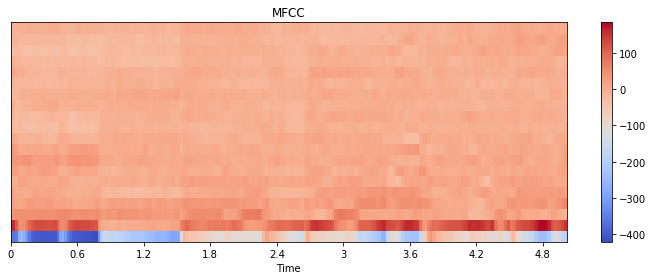

In [11]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [12]:
mfccs.shape

(20, 216)

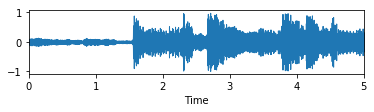

In [13]:
plt.figure()
plt.subplot(3, 1, 1)
librosa.display.waveplot(y, sr=sr)

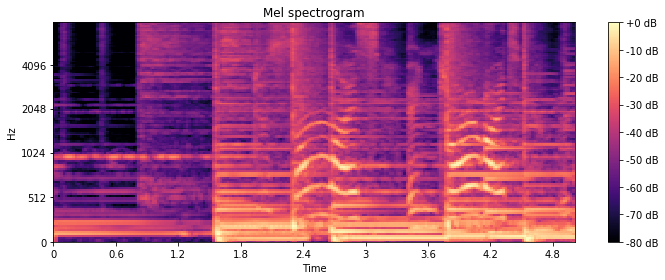

In [14]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [15]:
S.shape

(128, 216)

In [16]:
mfccs = librosa.feature.mfcc(y, sr=sr)

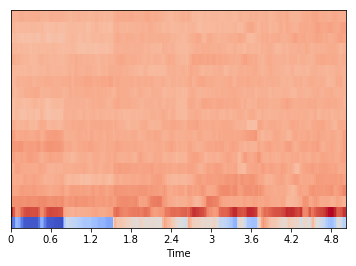

In [17]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [18]:
import sklearn
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print (mfccs.mean(axis=1))
print (mfccs.var(axis=1))

[-9.24800360e-16 -4.97544393e-16 -1.09171931e-15 -6.16790569e-17
 -1.30040012e-16 -3.06853308e-16  4.31753398e-17  6.42490176e-16
 -7.29868840e-17  1.49057721e-17  2.09708794e-16  5.39691748e-17
  2.17932668e-16 -1.97372982e-16  3.82667149e-16  1.71544877e-16
 -4.52827076e-16  6.06510726e-16  1.37749894e-16  3.51056632e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


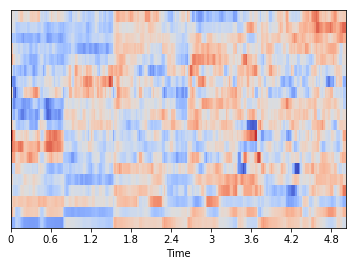

In [19]:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')


In [21]:
import essentia, essentia.standard as ess
hamming_window = ess.Windowing(type='hamming')
spectrum = ess.Spectrum()  # we just want the magnitude spectrum
mfcc = ess.MFCC(numberCoefficients=13)
frame_sz = 1024
hop_sz = 500

mfccs = numpy.array([mfcc(spectrum(hamming_window(frame)))[1]
               for frame in ess.FrameGenerator(x, frameSize=frame_sz, hopSize=hop_sz)])
print(mfccs.shape)
mfccs = sklearn.preprocessing.scale(mfccs)

ModuleNotFoundError: No module named 'essentia'

In [ ]:
plt.imshow(mfccs.T, origin='lower', aspect='auto', interpolation='nearest')
plt.ylabel('MFCC Coefficient Index')
plt.xlabel('Frame Index')